In [142]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [154]:
class LogisticRegression:
    
    def __init__(self,X,y,learningRate=0.00001, tolerance=0.00005,maxIteration=5000,index=[],rem_idx=False):
        super().__init__()
        
        self.X=X
        self.y=y
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.index=index
        self.rem_idx=rem_idx
        
    #Add intercept
    def addX0(self):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig
    
    #for cost function you can write either of 2- J(theta) or negative of log likelihood
    def costFunction(self,X,y):
        pred_=np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w)))-X.dot(self.w).dot(y)
        cost=pred_.sum()
        return cost
    
    def gradient(self,X,y):
        sigmoid=self.sigmoid(X.dot(self.w))
        grad=(sigmoid-y).dot(X)
        return grad
    #You get one gradient per dimension so do not do summation
    
    
    def gradientDescent(self, X,y):
        errors=[]
        last=float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w=self.w-self.learningRate*self.gradient(X,y)
            curr=self.costFunction(X,y)
            
            diff=last-curr
            last=curr
            
            errors.append(curr)
            
            if diff<self.tolerance:
                print("The model stopped lesrning")
                break
                
        #self.plot_cost(errors)
            
    def predict(self,X):
        pred=self.sigmoid(X.dot(self.w))
        return np.around(pred)
            

    def evaluate(self,y,y_hat):
        y=(y==1)       #true or  false
        y_hat=(y_hat==1)
            
        accuracy=(y==y_hat).sum()/y.size
        precision=(y&y_hat).sum()/y_hat.sum()
        recall=(y&y_hat).sum()/y.sum()
            
        return recall,precision, accuracy
        
    def remove_index(self,index,X,y):
        
        self.X=np.delete(self.X,index,0)
        self.y=np.delete(self.y,index,0)
        return self.X, self.y
        
    def fit(self):
        
        if self.rem_idx== True:
            print("Calling Remove Index")
            self.X,self.y=self.remove_index(self.index,self.X,self.y)
        
        self.X_train, self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=10)
            
        self.w=np.ones(self.X_train.shape[1],dtype=np.float64)*0
        self.gradientDescent(self.X_train,self.y_train)
            
        print(self.w)
            
        y_hat_train=self.predict(self.X_train)
        recall,precision,accuracy=self.evaluate(self.y_train,y_hat_train)
            
        print("Accuracy was :", accuracy)
        print("Recall was : ", recall)
        print("Precision was : ",precision)
            
            
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()


        
        

In [144]:
train_df=pd.read_excel(r'C:\Users\rutuj\OneDrive\Documents\Northeastern University MS in Data Analytics Engineering\4. Machine Learning\Python Class Lab Sessions\Lab 2 Logistic Regression\Lab3_data.xls',sheet_name='2004--2005 Data')
test_df=pd.read_excel(r'C:\Users\rutuj\OneDrive\Documents\Northeastern University MS in Data Analytics Engineering\4. Machine Learning\Python Class Lab Sessions\Lab 2 Logistic Regression\Lab3_data.xls',sheet_name='2004--2007 Data')

In [145]:
train_df.head()

,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170


In [146]:
train_df=train_df.values

In [147]:
X_train,y_train=train_df[:,1:],train_df[:,0]

In [155]:
logreg=LogisticRegression(X_train,y_train,tolerance=0.0,rem_idx=False)

In [156]:
logreg.fit()

  0%|          | 1/5000 [00:00<00:04, 999.83it/s]

The model stopped lesrning
[0.00284137 0.01052424]
Accuracy was : 0.78125
Recall was :  1.0
Precision was :  0.78125


##### Q1 Write a function as part of your LogisticRegression class that we wrote in the class and call it remove_index

In [200]:
rm_index_array=[0,38]

In [201]:
logreg1=LogisticRegression(X_train,y_train,tolerance=0.0,index=rm_index_array,rem_idx=True )

In [202]:
logreg1.fit()

Calling Remove Index


  0%|          | 1/5000 [00:00<?, ?it/s]

The model stopped lesrning
[0.00157769 0.0081994 ]
Accuracy was : 0.7333333333333333
Recall was :  1.0
Precision was :  0.7333333333333333


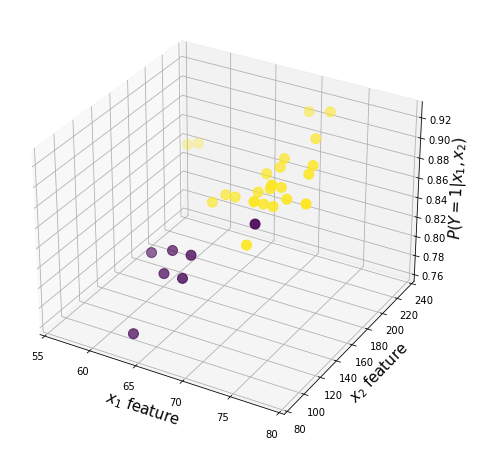

In [203]:
logreg.plot()

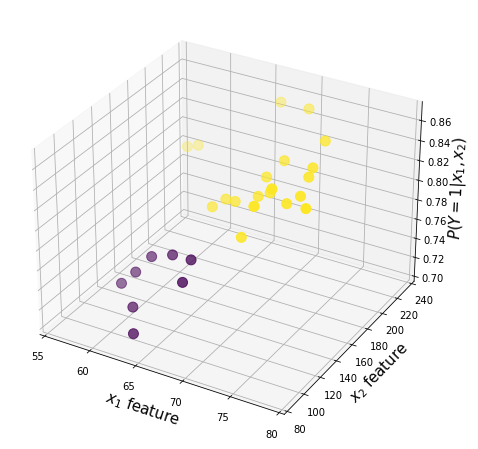

In [204]:
logreg1.plot()

C:\Users\rutuj\AppData\Local\Temp/ipykernel_32824/2473340097.py:127: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


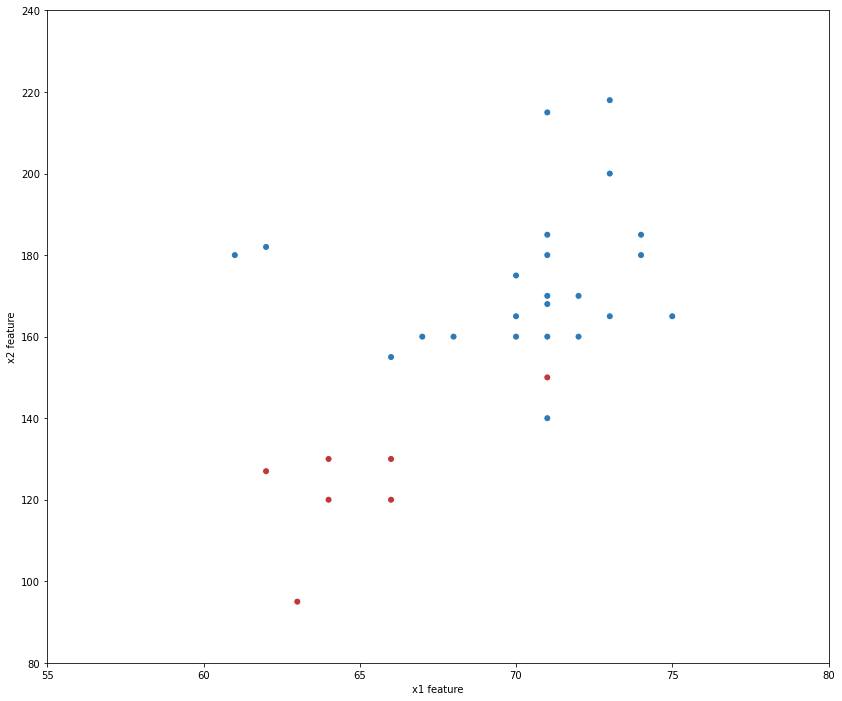

In [205]:
logreg.scatterPlt()

C:\Users\rutuj\AppData\Local\Temp/ipykernel_32824/2473340097.py:127: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


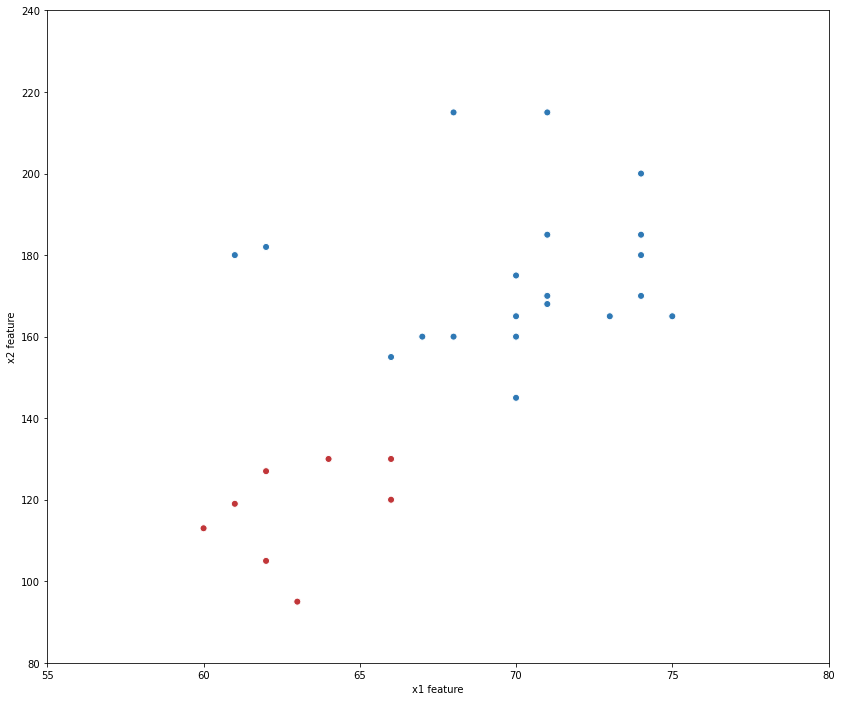

In [207]:
logreg1.scatterPlt()

In [206]:
#red-->0 blue-->1

In [193]:
train_df[0,:]

array([  1,  71, 140], dtype=int64)

In [194]:
train_df[38,:]

array([  0,  71, 150], dtype=int64)

##### Q2. Explain why removing data point number 1 and 39 has a large effect on the predicted probability of the model

Data point 1 --> (71,140)-->1 |  Data Point 39--> (71,150)-->0

Data point 39 i.e. (71,150) has characterstics like class 1 but originally belongs to class 0. Similarly, data point 1 i.e. (71,140) has characteristics like class 0, but originally belongs to class 1. Both these points are very close to the decision boundry and are misfits to their respecctive classes. When these points are removed, there are no points close to the decision point which belong to opposite class. Hence, a clear decision boundry is established and probabilities of other data points belonging to their class are increased and thus accuracy and precision are improved.

##### Q3 Plot the decision boundary by removing data point number 1 and 39

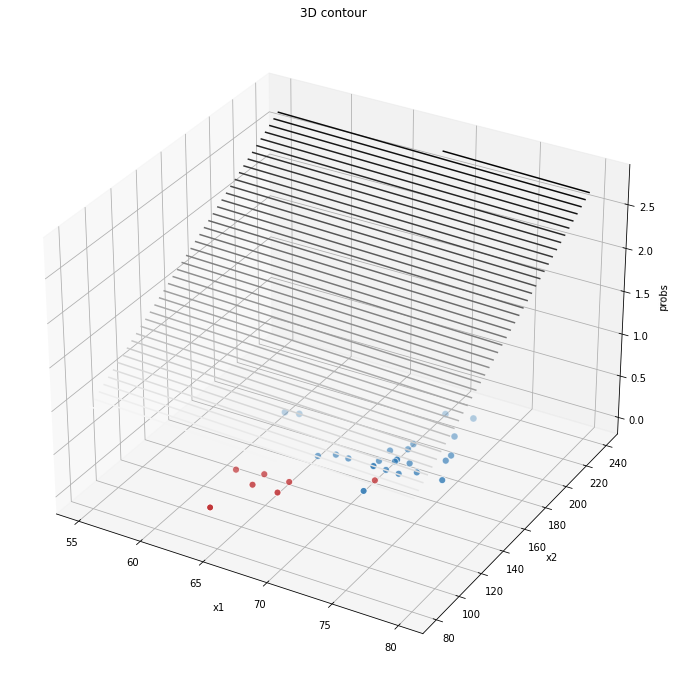

In [196]:
logreg.plot3D()

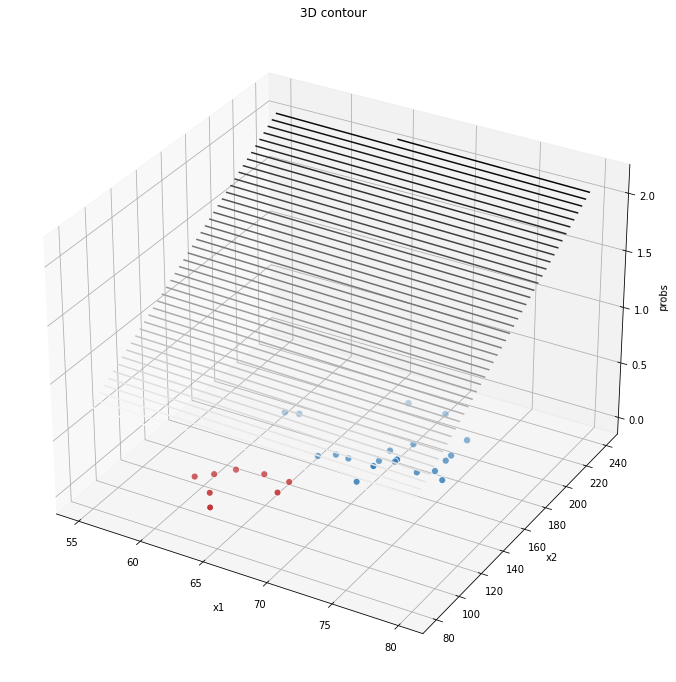

In [198]:
logreg1.plot3D()

In [42]:
df1=np.where(df['Y']==1)

<AxesSubplot:>

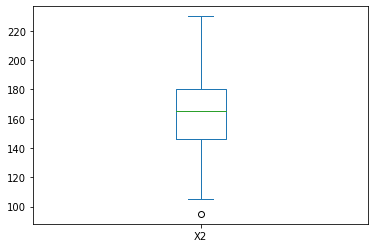

In [49]:
df['X2'].plot(kind='box')

In [46]:
df0=np.where(df['Y']==0)

<AxesSubplot:>

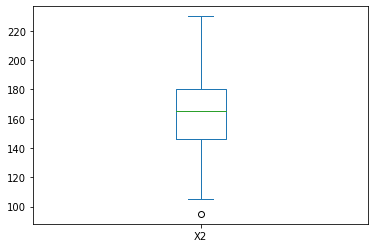

In [48]:
df['X2'].plot(kind='box')

<AxesSubplot:>

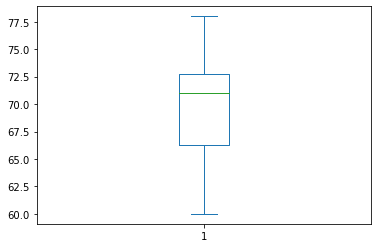

In [32]:
df[1].plot(kind='box')

<AxesSubplot:>

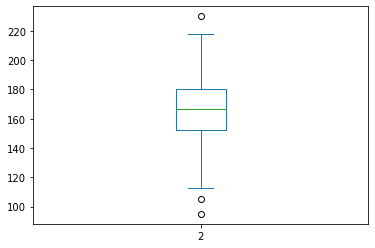

In [35]:
df1[2].plot(kind='box')

In [87]:
df

,Y,X1,X2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170
5,1,71,215
6,0,62,105
7,1,74,170
8,1,73,200
9,1,70,160
